<a href="https://colab.research.google.com/github/prisca31/child_mortality_worldwide/blob/main/ProjectMI_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering methods for countries about child mortality

## Data Exploration

In [ ]:
import pandas as pd

df = pd.read_csv('/content/df_mi_full.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id_key                             3757 non-null   object 
 1   Country                            3757 non-null   object 
 2   Year                               3757 non-null   int64  
 3   IDH                                3689 non-null   float64
 4   gnipc                              3749 non-null   float64
 5   gnipc_f                            3308 non-null   float64
 6   gnipc_m                            3308 non-null   float64
 7   GDI                                3256 non-null   float64
 8   gii                                3084 non-null   float64
 9   mf                                 3125 non-null   float64
 10  co2_prod                           3757 non-null   float64
 11  School                             3703 non-null   float

For the purposes of our analyses, we will only need the numeric features from our dataset. Select only these and save them in a variable called `df_numeric`

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

df_numeric.head()

,Year,IDH,gnipc,gnipc_f,gnipc_m,GDI,gii,mf,co2_prod,School,...,Life_expectancy_male,defecation,sanitation,drinking,handwashing,mmr_10000,abr_10000,beds_10000,pollution_death_10000,infant_death_5_10000
0,2000,0.340,1047.342686,NaN,NaN,NaN,NaN,2.0707,0.053579,1.264052,...,53.762,NaN,NaN,NaN,NaN,134.614410,1525.72,3.0,NaN,1315.35100
1,2001,0.344,981.133554,NaN,NaN,NaN,NaN,2.1080,0.054300,1.315551,...,54.272,NaN,NaN,NaN,NaN,127.343134,1508.63,3.9,NaN,1272.52545
2,2002,0.368,1364.239872,NaN,NaN,NaN,NaN,2.2186,0.063856,1.367049,...,55.227,NaN,NaN,NaN,NaN,127.730797,1481.41,3.9,NaN,1229.16410
3,2003,0.379,1465.417987,NaN,NaN,NaN,NaN,2.2614,0.068871,1.418548,...,56.032,NaN,NaN,NaN,NaN,119.609069,1433.70,3.9,NaN,1184.09660
4,2004,0.395,1453.663264,NaN,NaN,NaN,NaN,2.1719,0.052527,1.470046,...,56.658,NaN,NaN,NaN,NaN,111.488723,1388.27,3.9,NaN,1139.43980


In [ ]:
import matplotlib.pyplot as plt
# ne s'applique pas à ce dataset
# df_numeric.defecation.value_counts(normalize=True).plot(kind='bar');
# plt.title('Explicit vs non-explicit');

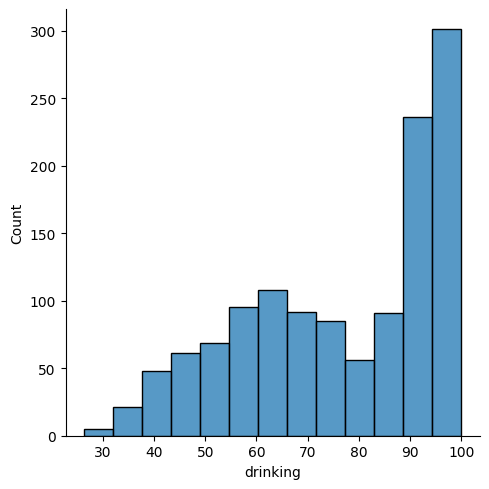

In [ ]:
import seaborn as sns

sns.displot(df_numeric['drinking']);

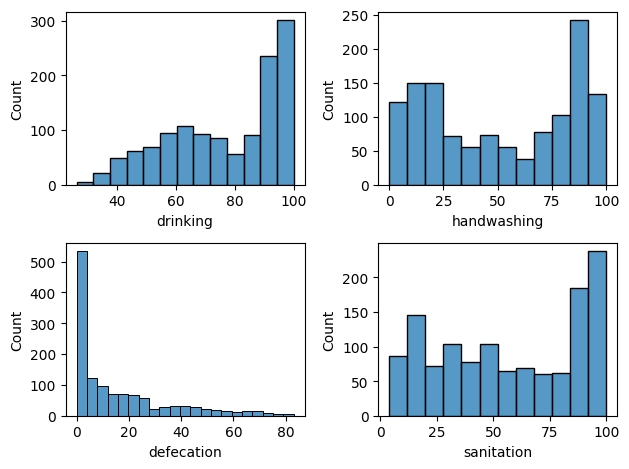

In [ ]:
import numpy as np

fig, axs = plt.subplots(2, 2)

var_list = ['drinking', 'handwashing', 'defecation', 'sanitation']
#var_list2 = ['doctors_10000', 'nurses_midwives_10000', 'beds_10000', 'mmmr_10000']
#var_list3 = ['abr_10000', 'mmmr_10000']

# Loop directly through the axs object and assign titles from the list
for row_axes, row_titles in zip(axs, np.array(var_list).reshape(2, 2)):
    for ax, title in zip(row_axes, row_titles):
        sns.histplot(x=df_numeric[title], ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id_key                             3757 non-null   object 
 1   Country                            3757 non-null   object 
 2   Year                               3757 non-null   int64  
 3   IDH                                3689 non-null   float64
 4   gnipc                              3749 non-null   float64
 5   gnipc_f                            3308 non-null   float64
 6   gnipc_m                            3308 non-null   float64
 7   GDI                                3256 non-null   float64
 8   gii                                3084 non-null   float64
 9   mf                                 3125 non-null   float64
 10  co2_prod                           3757 non-null   float64
 11  School                             3703 non-null   float

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_numeric,
                    x='infant_death_5_10000',
                    y='GDI',
                    z='IDH',
                    opacity=0.7,
                    width=500,
                    height=500
           )
fig.show()

## First model

Our goal is to cluster our countries into similar groups!

When we train a clustering model it will cluster our countries in n-dimensional space, where n is the number of features being fed into the model.

Let's start by instantiating a simple KMeans model.



In [ ]:
import pandas as pd

In [ ]:
df_clean = pd.read_csv('/content/df_ML.csv')
df_clean.drop(columns=['Unnamed: 0'], inplace=True)
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

df_numeric.head()

,IDH,gnipc_f,GDI,gii,health_expends_1_ppp,infant_death_5_10000
0,0.431,1033.807013,0.682,0.690,131.145371,962.80215
1,0.441,1014.018123,0.685,0.696,148.121658,921.89520
2,0.449,944.204099,0.684,0.707,143.669495,883.38895
3,0.457,795.393800,0.671,0.718,143.091522,847.03635
4,0.467,612.013873,0.634,0.734,151.917984,812.64810


In [ ]:
from sklearn.cluster import KMeans

kmeans_simple = KMeans(n_clusters=8, n_init='auto')
kmeans_simple.fit(df_numeric)

labels_simple = kmeans_simple.labels_
labels_simple

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(labels_simple,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 219, 1073,  451,   99,  286,   25,  574,  293]))

In [ ]:
fig = px.scatter_3d(df_numeric,
                    x='IDH',
                    y='GDI',
                    z='infant_death_5_10000',
                    color=labels_simple,
                    width=500,
                    height=500)
fig.show()

## Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler

# This might be a new type of scaler to you! Robust scaler is more... robust... to outliers in the
# data when normalizing. Some of our variables have very non-normal distrubutions.

scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric),
                              columns=df_numeric.columns)
df_scaled

,IDH,gnipc_f,GDI,gii,health_expends_1_ppp,infant_death_5_10000
0,-1.238494,-0.428672,-3.325301,0.895522,-0.328888,1.838479
1,-1.196653,-0.429817,-3.289157,0.913433,-0.317708,1.741881
2,-1.163180,-0.433857,-3.301205,0.946269,-0.320640,1.650952
3,-1.129707,-0.442469,-3.457831,0.979104,-0.321021,1.565109
4,-1.087866,-0.453081,-3.903614,1.026866,-0.315208,1.483905
...,...,...,...,...,...,...
3015,-0.753138,-0.387454,-0.313253,0.414925,-0.273397,0.919752
3016,-0.732218,-0.385032,-0.216867,0.385075,-0.266284,0.879111
3017,-0.682008,-0.372450,-0.277108,0.391045,-0.237966,0.822765
3018,-0.682008,-0.372450,-0.277108,0.391045,-0.237966,0.822765


## Modelling with preprocessed data

Now, let's train and fit a model in the same way that we did above. However, this time we will use the scaled data! Save the labels in a variable called `labels_scaled`

In [ ]:
kmeans_scaled = KMeans(n_clusters=8, n_init='auto')
kmeans_scaled.fit(df_scaled)

labels_scaled = kmeans_scaled.labels_
labels_scaled

array([2, 2, 2, ..., 5, 5, 5], dtype=int32)

Run the cell below to see how our clusters look in 3D space, but with our newly scaled data.

In [ ]:
fig_scaled = px.scatter_3d(df_numeric,
                            x='IDH',
                            y='GDI',
                            z='infant_death_5_10000',
                           color=labels_scaled,
                           width=500,
                           height=500)
fig_scaled.show()

## Finding the right value for *K*

It should look a bit more tidy, maybe a bit more stratified! Progress!

**However, it still doesn't look perfect**. Remember though, we are only looking at 3 dimensions out of the 10 dimensions that our model is trained on.

It might be that, if we could visualise 10 dimensionsal space, we would see some much more intuitively shaped clusters!

So far we have been using 8 clusters for our models so far, but we havented tested whether this makes sense.

Let's use *the elbow method* to check how many of clusters we should ideally be using for this dataset. Do this below. Remember to use a plot to visualise your results.



In [ ]:
nb_clusters_to_try = np.arange(1, 21, 1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [ ]:
inertias = []

for k in nb_clusters_to_try:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

inertias

[11572.861051266933,
 6154.915051591215,
 3545.4369570645185,
 2827.8746228422183,
 2239.809954238885,
 2018.5704102695972,
 1833.9463617399858,
 1594.4713366571316,
 1454.152673338825,
 1326.328060148161,
 1253.7808391676551,
 1185.7884942927828,
 1129.691455789831,
 1080.924796734684,
 1004.8098734044371,
 961.8671056594758,
 925.3570490657313,
 879.7936655267337,
 855.5689345469556,
 809.2529485742631]

In [ ]:
import plotly.express as px

fig = px.line(y=inertias,
              x=range(1, len(inertias) + 1),
              labels={'x': 'nb centroids', 'y':'Inertia'},
              title="Elbow method")
fig.show()

It looks as though have around 6 clusters makes sense with our dataset. Create a new KMeans model using 6 clusters and plot it in 3D space using the same process that we have done above.

## Creating a model with the ideal number of clusters

In [ ]:
country_clusters = 5

kmeans = KMeans(n_clusters=country_clusters, n_init='auto', max_iter=300)

kmeans.fit(df_scaled)

labelling = kmeans.labels_

fig_scaled = px.scatter_3d(df_scaled,
                    x='IDH',
                    y='GDI',
                    z='infant_death_5_10000',
                           color=labels_scaled,
                           width=500,
                           height=500)
fig_scaled.show()

The chart doesn't reveal a whole lot more, but perhaps we can create some theoretical playlists based on our clusters?

Add the new labels from our model that has 6 clusters to our original spotify dataframe as a column called 'label'.

In [ ]:
df_clean['label'] = pd.Series(labelling)
df_clean.head()

,id_key,Country,IDH,gnipc_f,GDI,gii,health_expends_1_ppp,infant_death_5_10000,label
0,AFG_2008,Afghanistan,0.431,1033.807013,0.682,0.690,131.145371,962.80215,3
1,AFG_2009,Afghanistan,0.441,1014.018123,0.685,0.696,148.121658,921.89520,3
2,AFG_2010,Afghanistan,0.449,944.204099,0.684,0.707,143.669495,883.38895,3
3,AFG_2011,Afghanistan,0.457,795.393800,0.671,0.718,143.091522,847.03635,3
4,AFG_2012,Afghanistan,0.467,612.013873,0.634,0.734,151.917984,812.64810,3


In [ ]:
df_clean['label'].value_counts()

,count
label,
2,1075
1,694
0,606
3,377
4,268


In [ ]:
df_stat_cluster = df_clean.groupby('label').describe()

In [ ]:
df2 = df_stat_cluster

In [ ]:
df_stat_cluster.reset_index(inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (label, )                      5 non-null      int32  
 1   (IDH, count)                   5 non-null      float64
 2   (IDH, mean)                    5 non-null      float64
 3   (IDH, std)                     5 non-null      float64
 4   (IDH, min)                     5 non-null      float64
 5   (IDH, 25%)                     5 non-null      float64
 6   (IDH, 50%)                     5 non-null      float64
 7   (IDH, 75%)                     5 non-null      float64
 8   (IDH, max)                     5 non-null      float64
 9   (gnipc_f, count)               5 non-null      float64
 10  (gnipc_f, mean)                5 non-null      float64
 11  (gnipc_f, std)                 5 non-null      float64
 12  (gnipc_f, min)                 5 non-null      float64

In [ ]:
df_stat_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (IDH, count)                   5 non-null      float64
 1   (IDH, mean)                    5 non-null      float64
 2   (IDH, std)                     5 non-null      float64
 3   (IDH, min)                     5 non-null      float64
 4   (IDH, 25%)                     5 non-null      float64
 5   (IDH, 50%)                     5 non-null      float64
 6   (IDH, 75%)                     5 non-null      float64
 7   (IDH, max)                     5 non-null      float64
 8   (gnipc_f, count)               5 non-null      float64
 9   (gnipc_f, mean)                5 non-null      float64
 10  (gnipc_f, std)                 5 non-null      float64
 11  (gnipc_f, min)                 5 non-null      float64
 12  (gnipc_f, 25%)                 5 non-null      float64
 13 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer PCA pour réduire la dimension à 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clean.drop('label', axis=1))  # Enlever 'cluster' des données pour PCA

# Visualiser les clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_clean['label'], cmap='viridis')
plt.title('Répartition des clusters après PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

KeyError: "['label'] not found in axis"

## Generating Spotify playlists based on our clusters!

In [ ]:
daily_mixes = {}

for num_cluster in np.unique(labelling):

  daily_mixes[num_cluster] = df_clean[df_clean['label'] == num_cluster]

Run the cell below to print out our groups : warning strange names printed do not consider the "playlist" name

In [ ]:
for key,value in daily_mixes.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['id_key', 'Country']])

--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,id_key,Country
515,CMR_2014,Cameroon
739,COD_2009,Democratic Republic of Congo
2972,YEM_2000,Yemen
1681,MLI_2008,Mali
1857,MOZ_2009,Mozambique


--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,id_key,Country
1668,MDV_2012,Maldives
1387,KAZ_2004,Kazakhstan
1640,MYS_2004,Malaysia
2374,SRB_2006,Serbia
1808,MNG_2011,Mongolia


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,id_key,Country
1929,NLD_2012,Netherlands
2875,USA_2004,United States
1275,IRL_2017,Ireland
1593,LUX_2019,Luxembourg
1584,LUX_2010,Luxembourg


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,id_key,Country
2704,TLS_2015,Timor
2774,TUR_2004,Turkey
962,GAB_2008,Gabon
2473,ZAF_2008,South Africa
3003,ZMB_2015,Zambia


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


,id_key,Country
2441,SVK_2016,Slovakia
1054,GRC_2008,Greece
1565,LTU_2012,Lithuania
1160,ISL_2004,Iceland
1711,MLT_2017,Malta


### Running clustering with DBSCAN

As a bonus, let's try and run a clustering analysis using [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)!

Remember, with `DBSCAN` we don't need to *a-prior* select the number of clusters we will end up with.

Instantiate and fit a `DBSCAN` model. Read the documentation and be sure to trial out different values for `epsilon` and `min_samples` - **this is essential to return reasonable results!** [This article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) has some helpful tips on how to help pick reasonable values

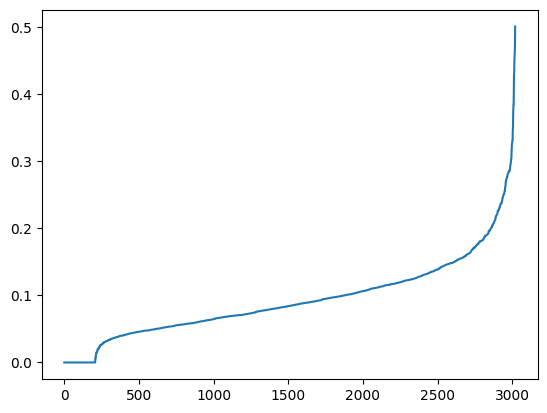

In [ ]:
# Finding the ideal value for epsilon

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances);

# Main crook occurs at approx. between 1 & 1.5 - you could loop through these values!

epsilon = 0.3

In [ ]:
from sklearn.cluster import DBSCAN

# Min samples estimate is calculate here as n_features * 2
min_samples = len(df_scaled.columns) * 2

countries_dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)

countries_dbscan.fit(df_scaled)

DBSCAN(eps=0.3, min_samples=12)

How many clusters has the model created? What is their distribution? Save your labels in a variable called `dbscan_labels`. Is this the same as what we came up with using the Elbow Method?

In [ ]:
dbscan_labels = countries_dbscan.labels_

np.unique(dbscan_labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([ 566, 2222,  140,   20,   12,   12,   38,   10]))

Run the cell below to plot your clusters using the DBSCAN labels.

In [ ]:
fig_dbscan = px.scatter_3d(df_scaled,
                           x='IDH',
                           y='GDI',
                           z='infant_death_5_10000',
                           color=dbscan_labels,
                           width=500,
                           height=500)
fig_dbscan.show()

Using your fitted model, add in your predicted cluster labels for each song to the spotify dataframe in a new column called 'label_dbscan'

<details>
    <summary><i>Hint</i></summary>

Your number of clusters will be very dependent on the parameters you specified when instantiaing your model!
</details>

In [ ]:
df_clean['label_dbscan'] = pd.Series(dbscan_labels)

df_clean.head()

,id_key,Country,IDH,gnipc_f,GDI,gii,health_expends_1_ppp,infant_death_5_10000,label,label_dbscan
0,AFG_2008,Afghanistan,0.431,1033.807013,0.682,0.690,131.145371,962.80215,0,-1
1,AFG_2009,Afghanistan,0.441,1014.018123,0.685,0.696,148.121658,921.89520,0,-1
2,AFG_2010,Afghanistan,0.449,944.204099,0.684,0.707,143.669495,883.38895,0,-1
3,AFG_2011,Afghanistan,0.457,795.393800,0.671,0.718,143.091522,847.03635,0,-1
4,AFG_2012,Afghanistan,0.467,612.013873,0.634,0.734,151.917984,812.64810,0,-1


In [ ]:
df_clean.label_dbscan.value_counts()

,count
label_dbscan,
0,2222
-1,566
1,140
5,38
2,20
3,12
4,12
6,10


The cell below will generate some new playlists using the DBSCAN clusters!

In [ ]:
daily_mixes_dbscan = {}

for num_cluster in np.unique(dbscan_labels):

  daily_mixes_dbscan[num_cluster] = df_clean[df_clean['label_dbscan'] == num_cluster]


for key,value in daily_mixes_dbscan.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['id_key', 'Country']])

--------------------------------------------------
Here are some songs for playlist -1
--------------------------------------------------


ValueError: Cannot take a larger sample than population when 'replace=False'

You've just completed your first unsupervised clustering! **Congrats**! This is a *very* commonplace methodology, especially in recommender systems.

By no means is the example we have gone through meant to be perfect (especially with a subjective topic such as music + limited features), and it can churn out some pretty chaotic results, but **the principles will very much hold true for all clustering tasks**.

Importantly, *never forgot to scale your data if you are using a distance-based algorithm*!

Finally, here are some links to more information about Spotify data / the Spotify API (perhaps some project inspiration)

- [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)